# 映画レビュー分類の過学習を防ぐ

In [1]:
from keras.datasets import imdb
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

Using TensorFlow backend.


In [2]:
#one-hot-encoding
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        result[i, sequences] = 1.
    return result

In [3]:
#encode
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [4]:
#target
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## unit数を減らす

In [5]:
from keras import models
from keras import layers

#define model Sequential
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#最適化: rmsprop
#損失関数: 交差エントロピー
#監視指標: accuracy
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
#make validation_data (size=10000)
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
#learning
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 24s 2ms/step - loss: 0.6095 - acc: 0.6725 - val_loss: 0.5561 - val_acc: 0.6862
Epoch 2/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.5058 - acc: 0.7937 - val_loss: 0.5068 - val_acc: 0.8209
Epoch 3/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.4573 - acc: 0.8631 - val_loss: 0.4870 - val_acc: 0.8748
Epoch 4/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.4258 - acc: 0.8974 - val_loss: 0.4744 - val_acc: 0.8538
Epoch 5/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.4008 - acc: 0.9173 - val_loss: 0.4694 - val_acc: 0.8599
Epoch 6/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.3799 - acc: 0.9366 - val_loss: 0.4858 - val_acc: 0.8417
Epoch 7/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.3624 - acc: 0.9473 - val_loss: 0.4664 - 

In [ ]:
#see History Object's key (学習に関する全てのlogが含まれる(上の学習過程のそれぞれの値))
history_dict = history.history
history_dict.keys()

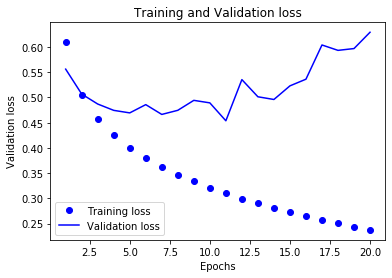

In [11]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_valubes, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

## L2正則化

In [18]:
from keras import models
from keras import layers
from keras import regularizers

#define model Sequential
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#最適化: rmsprop
#損失関数: 交差エントロピー
#監視指標: accuracy
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
#make validation_data (size=10000)
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
#learning
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.5616 - acc: 0.7838 - val_loss: 0.4352 - val_acc: 0.8675
Epoch 2/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.3662 - acc: 0.8935 - val_loss: 0.3664 - val_acc: 0.8792
Epoch 3/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.2932 - acc: 0.9191 - val_loss: 0.3324 - val_acc: 0.8906
Epoch 4/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.2558 - acc: 0.9309 - val_loss: 0.3428 - val_acc: 0.8801
Epoch 5/20
15000/15000 [==============================] - 5s 313us/step - loss: 0.2294 - acc: 0.9406 - val_loss: 0.3285 - val_acc: 0.8856
Epoch 6/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.2136 - acc: 0.9469 - val_loss: 0.3346 - val_acc: 0.8850
Epoch 7/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.2072 - acc: 0.9480 - val_loss: 0.3421 - 

In [21]:
#see History Object's key (学習に関する全てのlogが含まれる(上の学習過程のそれぞれの値))
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

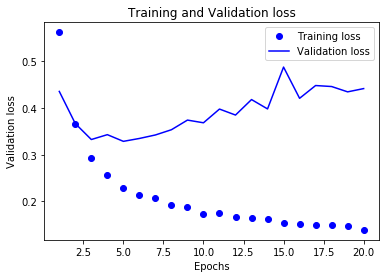

In [22]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

## ドロップアウト

In [23]:
from keras import models
from keras import layers

#define model Sequential
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

#最適化: rmsprop
#損失関数: 交差エントロピー
#監視指標: accuracy
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
#make validation_data (size=10000)
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
#learning
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 361us/step - loss: 0.6448 - acc: 0.6276 - val_loss: 0.5690 - val_acc: 0.7962
Epoch 2/20
15000/15000 [==============================] - 5s 315us/step - loss: 0.5267 - acc: 0.7541 - val_loss: 0.4459 - val_acc: 0.8660
Epoch 3/20
15000/15000 [==============================] - 5s 341us/step - loss: 0.4433 - acc: 0.8167 - val_loss: 0.3615 - val_acc: 0.8779
Epoch 4/20
15000/15000 [==============================] - 5s 302us/step - loss: 0.3830 - acc: 0.8551 - val_loss: 0.3218 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 5s 324us/step - loss: 0.3362 - acc: 0.8802 - val_loss: 0.2994 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 4s 282us/step - loss: 0.3011 - acc: 0.8955 - val_loss: 0.3017 - val_acc: 0.8862
Epoch 7/20
15000/15000 [==============================] - 4s 266us/step - loss: 0.2688 - acc: 0.9099 - val_loss: 0.2824 - 

In [26]:
#see History Object's key (学習に関する全てのlogが含まれる(上の学習過程のそれぞれの値))
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

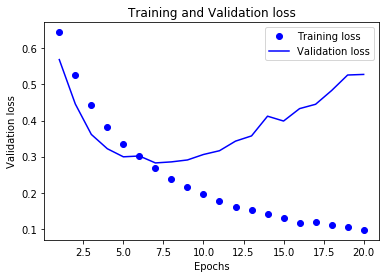

In [27]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()